# Matplotlib

Matplotib puede ser cargado de la siguiente forma:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt


El siguiente comando permite definir los estilos predefinidos de graficación:

In [2]:
plt.style.use('classic')


y el siguiente permite generar gráficos incrustados (no interactivos) en este archivo Markdown, asociados a un archivo PNG:

In [3]:
%matplotlib inline

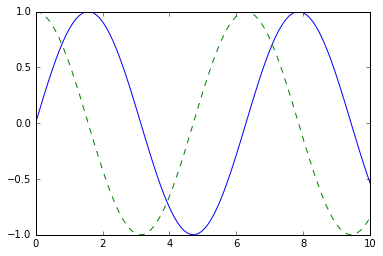

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-');
plt.plot(x, np.cos(x), '--');

y este gráfico puede se guardado en formato PNG:

In [5]:
fig.savefig('data/my_figure.png')


Hay dos formas de hacer gráficos en Matplotlib, una es a través `pyplot` que emula la forma en que se grafica en MATLAB (interfaz de pylab):

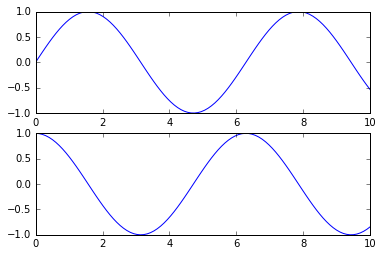

In [6]:
plt.figure()

plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

y otra es usando un estilo de interfaz basada en objetos:

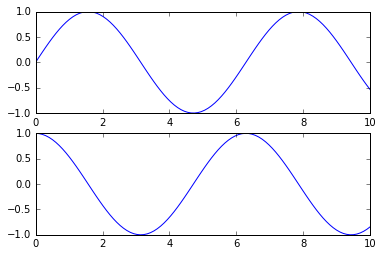

In [7]:
 # First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


## Gráficos de Líneas

Usando el comando `ax.plot`:

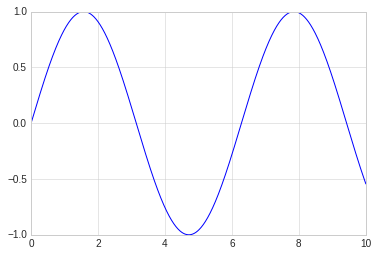

In [8]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

o usando pylab:

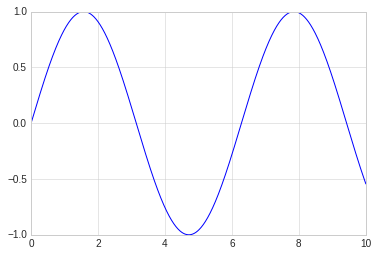

In [9]:
plt.plot(x, np.sin(x));


Única figura con múltiples líneas:

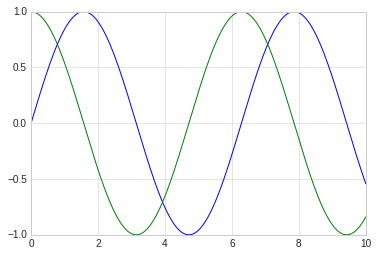

In [10]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));


Y el formato de línea se puede modificar de manera muy similar a como se hace en MATLAB:

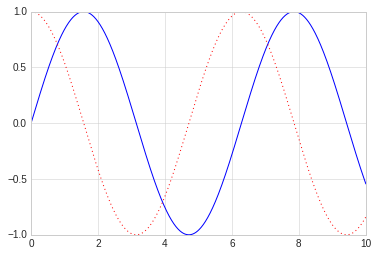

In [11]:
plt.plot(x, np.sin(x), color='blue', linestyle='solid')
plt.plot(x, np.cos(x), color='red', linestyle='dotted');

También podemos definir los límites de los ejes con estos comandos:

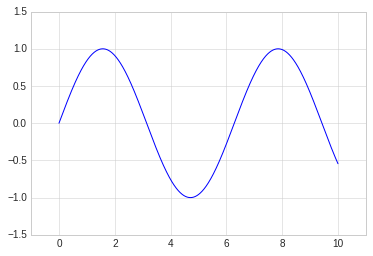

In [12]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

o bien usando el comando `plt.axis` :

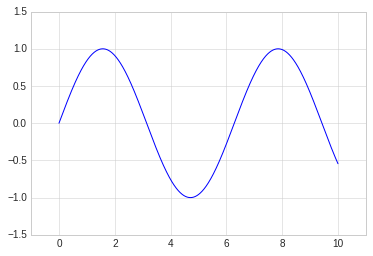

In [13]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);


Etiquetado de gráficos:

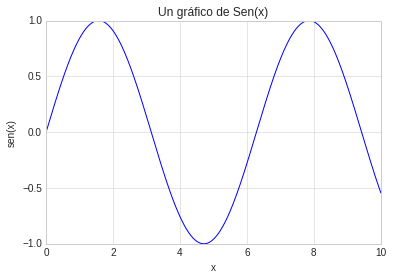

In [14]:
plt.plot(x, np.sin(x))
plt.title("Un gráfico de Sen(x)")
plt.xlabel("x")
plt.ylabel("sen(x)");


Leyendas:

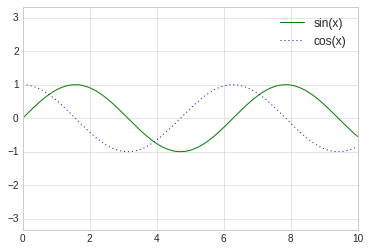

In [15]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();


## Diagramas de Dispersión

Una forma de hacer diagramas de dispersión es usando `plt.plot`:

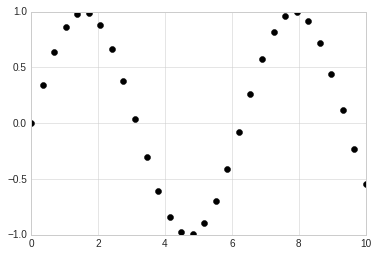

In [16]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

Esta comando admite múltiples argumentos:

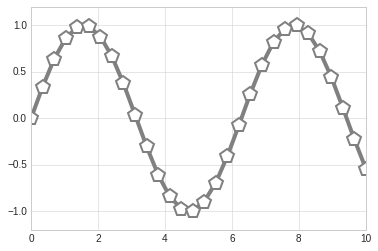

In [17]:
plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)
plt.ylim(-1.2, 1.2);

O bien se puede utilizar `plt.scatter` (menos eficiente en bases grandes)

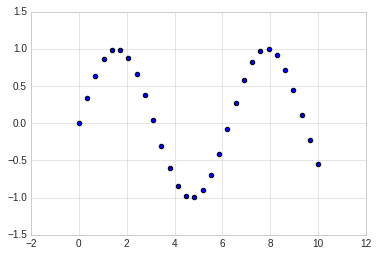

In [18]:
plt.scatter(x, y, marker='o');

pero con mayor flexibilidad para definir formato punto por punto:

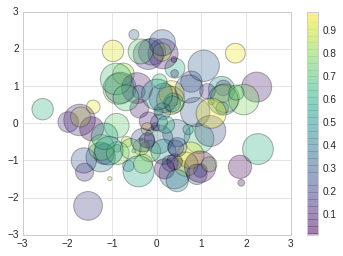

In [19]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

## Barras de error

El comando `plt.errorbar` permite definir barras de error alrededor de puntos:

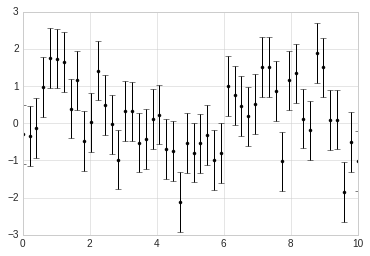

In [20]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

Para graficar regiones de confianza (equivalente al geom_ribbon de ggplot2), se puede usar una combinación de `plt.plot` y `plt.fill_between`.

## Gráficos de Contorno

El comando `plt.contour` permite graficar funciones bivariadas:

In [21]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


In [22]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

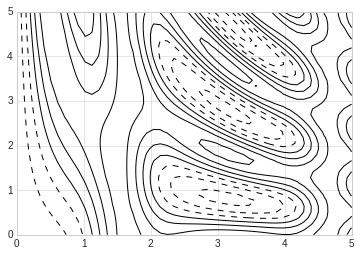

In [23]:
plt.contour(X, Y, Z, colors='black');

El argumento `cmap` permite definir paletas de colores en los gráficos de contorno (ver https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). El comando `plt.contourf` ofrece rellenado en los contornos.

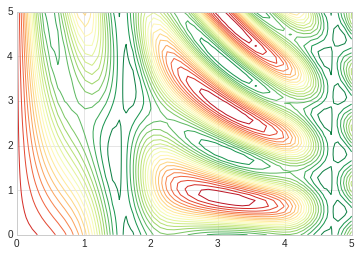

In [24]:
plt.contour(X, Y, Z, 20, cmap='RdYlGn');

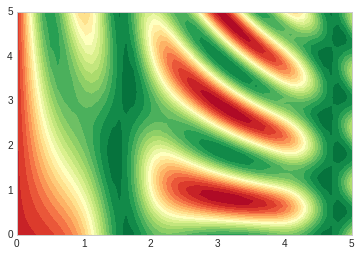

In [25]:
plt.contourf(X, Y, Z, 20, cmap='RdYlGn');

## Histogramas

Un histograma simple se define con el comando `plt.hist`:

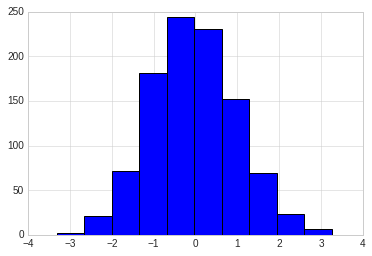

In [26]:
data = np.random.randn(1000)
plt.hist(data);

y este admite múltiples argumentos:

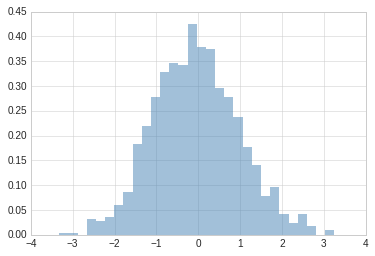

In [27]:
plt.hist(data, bins=30, density=True, alpha=0.5,
    histtype='stepfilled', color='steelblue',
    edgecolor='none');

y finalmente, podemos hacer varios histogramas en un mismo gráfico usando la opción `stepfilled` de `histtype`:

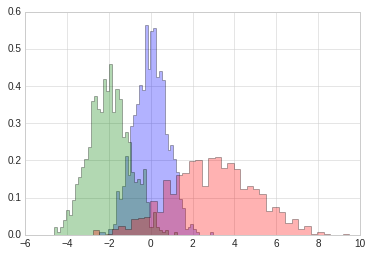

In [28]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs);

## Personalización de leyendas de gráficos

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

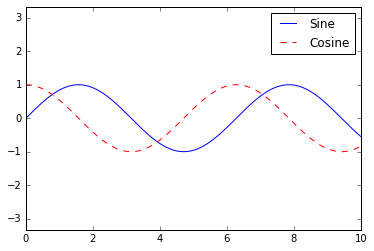

In [30]:
plt.style.use('classic')

%matplotlib inline
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

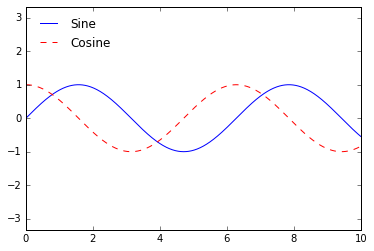

In [31]:
ax.legend(loc = 'upper left', frameon = False)
fig

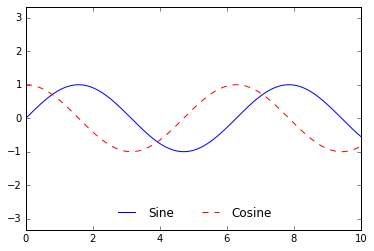

In [32]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig


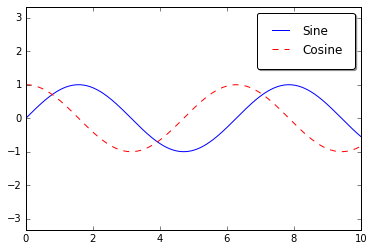

In [33]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

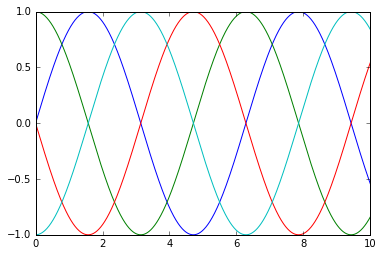

In [34]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

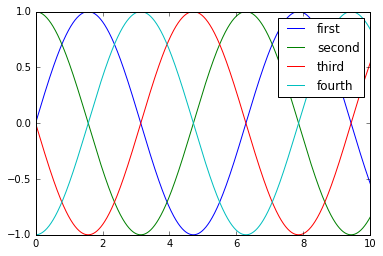

In [35]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines, ['first', 'second', 'third', 'fourth']);

In [37]:
lines

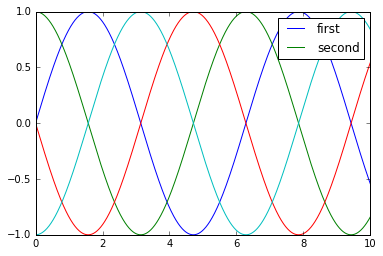

In [38]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);



In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

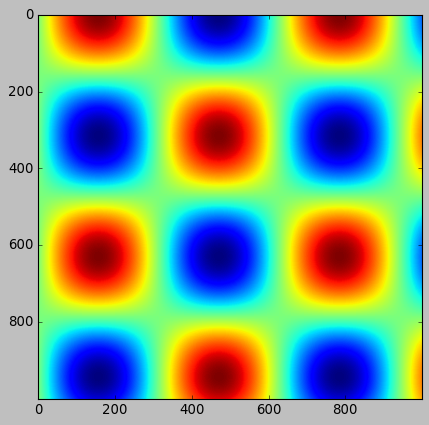

In [40]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)

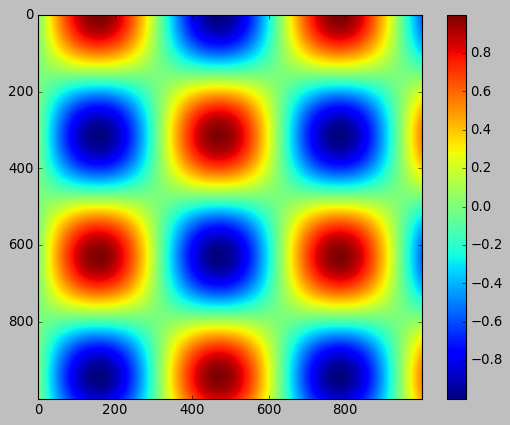

In [41]:
plt.imshow(I)
plt.colorbar()

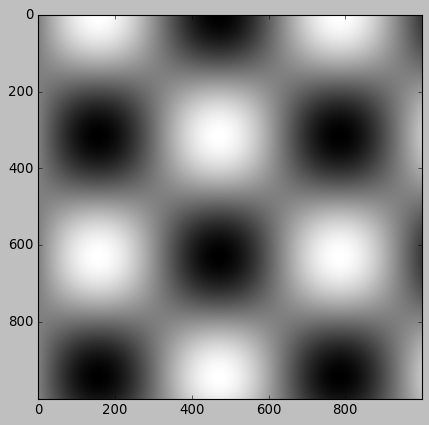

In [42]:
plt.imshow(I,cmap = 'gray')

La cantidad de colores que tiene matplotlib disponibles para personalizar los gráficos es casi infinita. 

En este sitio pueden revisar todas las posibilidades https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Por ejemplo 

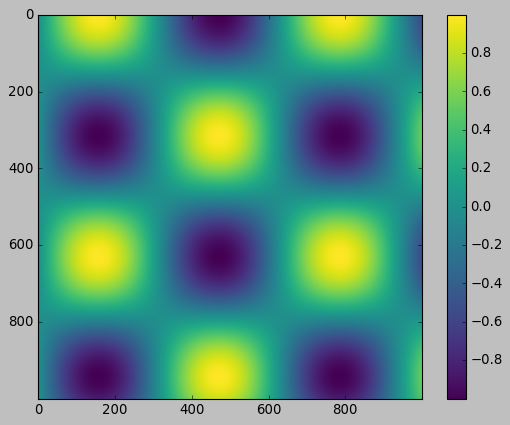

In [43]:
plt.imshow(I, cmap = 'viridis')
plt.colorbar()

In [44]:
 %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

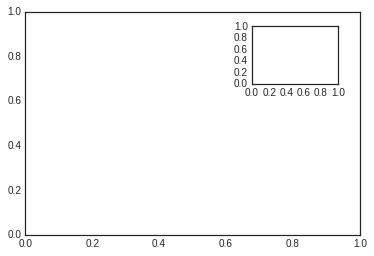

In [45]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

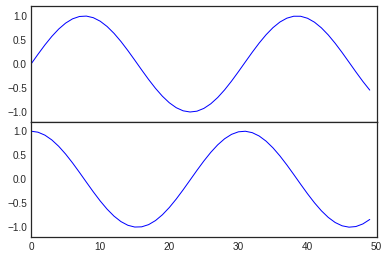

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

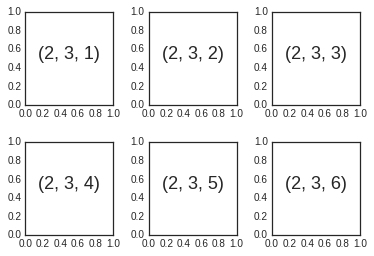

In [47]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

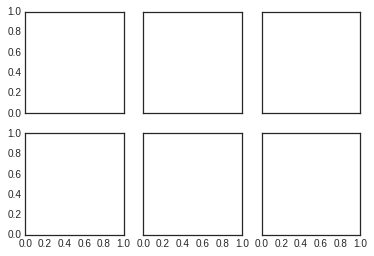

In [48]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

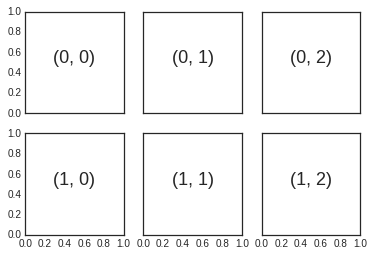

In [49]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In [50]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

GridSpec(2, 3)

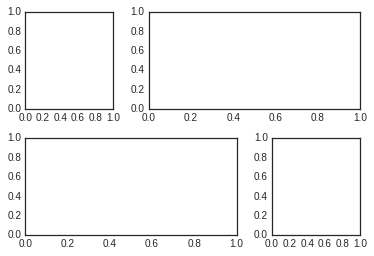

In [51]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

In [52]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].legend(['a', 'b', 'c'], loc='lower left')


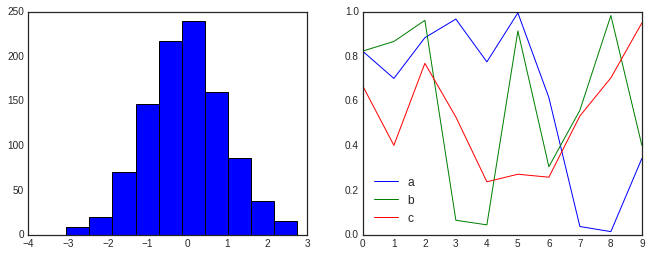

In [53]:
hist_and_lines()

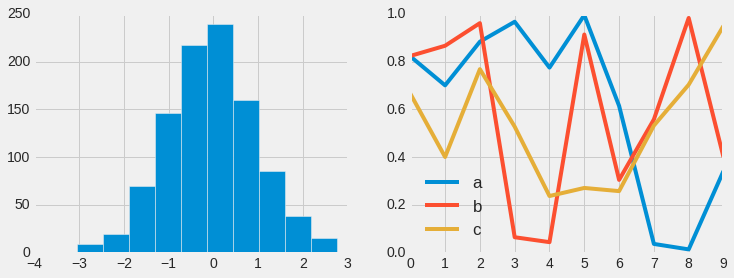

In [54]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

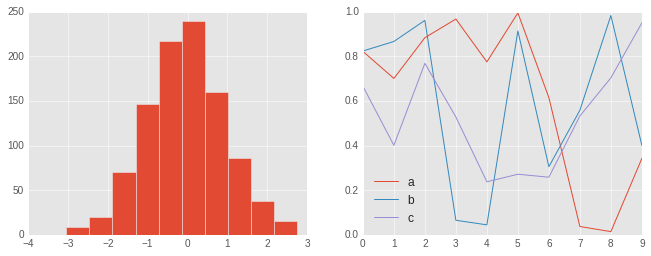

In [55]:
with plt.style.context('ggplot'):
    hist_and_lines()

La lista completa de estilos los pueden encontrar acá: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

In [56]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

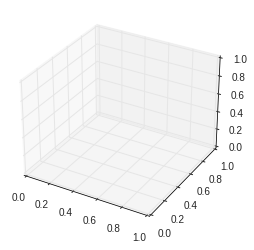

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')

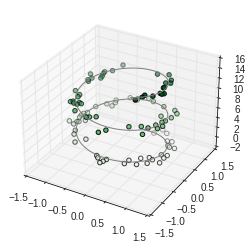

In [58]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


In [92]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

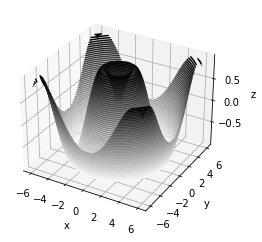

In [93]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [12]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values


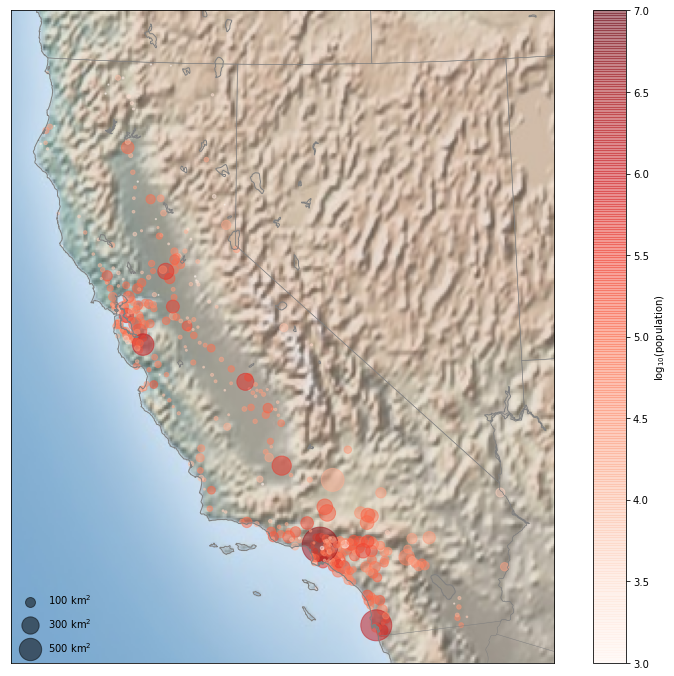

In [89]:
# 1. Draw the map background
fig = plt.figure(figsize=(14,12))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)
# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left'); 

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature

/usr/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


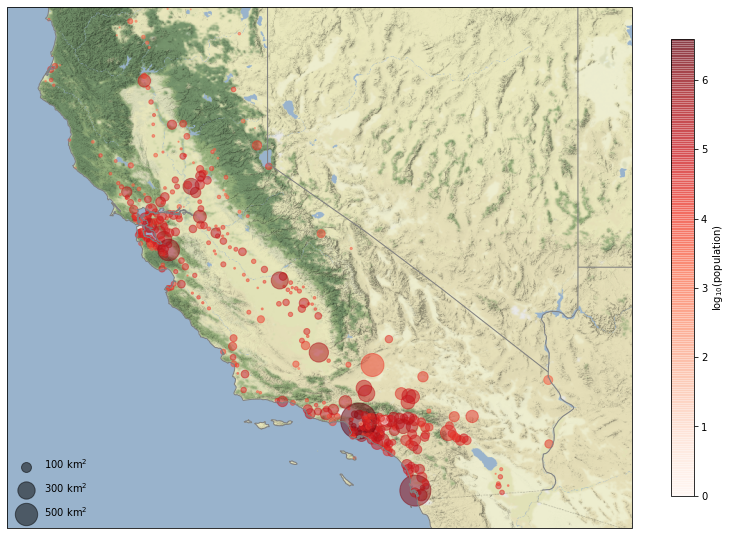

In [88]:
# 1. Draw the map background
# fig = plt.figure()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
#  ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-113, -125, 32, 42], crs=ccrs.PlateCarree())
stamen_terrain = cimgt.Stamen('terrain-background')
ax.add_image(stamen_terrain, 8)


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(cfeature.LAND, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(states_provinces, edgecolor='gray')


# 2. scatter city data, with color reflecting population
# and size reflecting area
sc = ax.scatter(lon, lat, c=np.log10(population),
                s=area, cmap='Reds',  
                alpha=0.5,transform=crs.PlateCarree())


# # 3. create colorbar and legend
cb = fig.colorbar(sc, ax=ax, shrink=0.7)
cb.set_label(r'$\log_{10}({\rm population})$')

# # make legend with dummy points
for a in [100, 300, 500]:
    ax.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False,
            labelspacing=1, loc='lower left'); 